<a href="https://colab.research.google.com/github/Raseealmanea/DaS/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

Outliers in Views:
10       5515063
36       4627877
53      26015618
68       7333164
85      11281066
          ...   
2429     9318975
2438     5610311
2439    43765104
2441    81284690
2445     6019434
Name: Views, Length: 242, dtype: int64 

Outliers in Likes:
2        376824
11       188162
33       282557
36       170583
43       236426
         ...   
2429     190004
2432     144375
2439     794938
2441    2559951
2451     140455
Name: Likes, Length: 304, dtype: int64 

Outliers in Comments:
2       44727
5       13709
7       10215
10      10600
12      12660
        ...  
2419    10389
2429    24778
2439    24836
2441    49402
2446    11580
Name: Comments, Length: 284, dtype: int64 



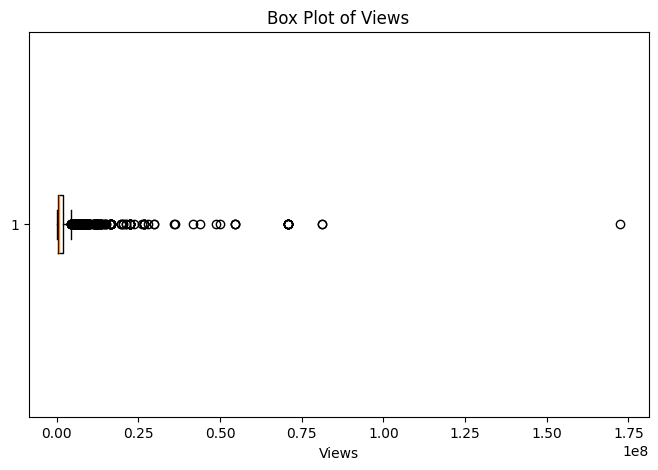

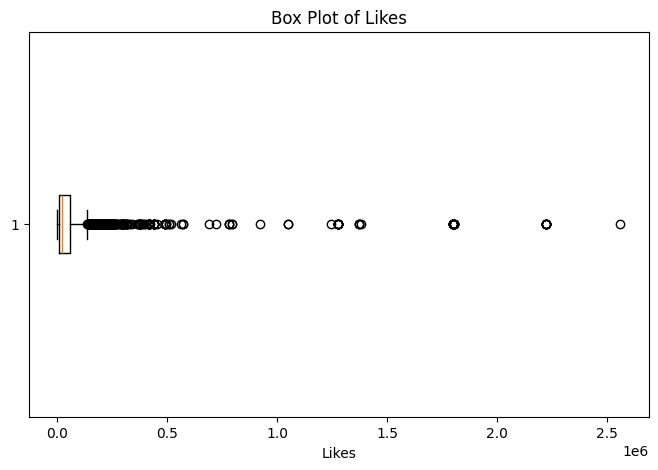

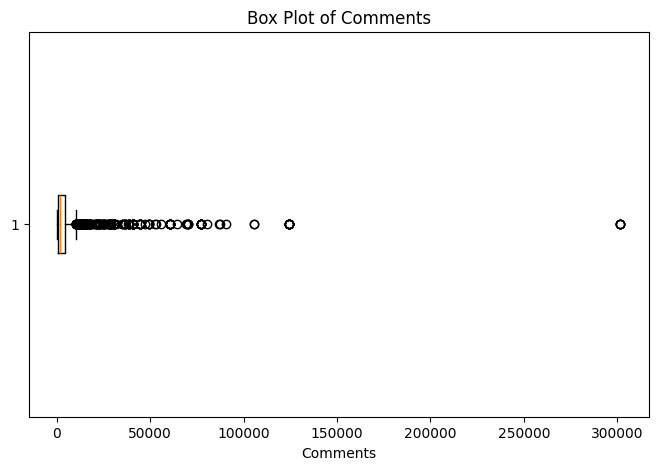

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Load the dataset
file_path = "/content/youtube_trending_videos_selected_features (1).csv"
df = pd.read_csv(file_path)

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:  # Select only numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect outliers
outliers_dict = detect_outliers_iqr(df)

# Print outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outliers, "\n")

# Box plot for numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In our analysis, we have identified outliers in the dataset, particularly in metrics related to video performance. However, rather than removing these outliers, we have chosen to retain them. The primary reason for this decision is that we are specifically interested in understanding videos that achieve a large number of views. These high-performing videos often appear as outliers, but they provide valuable insights into trends, audience preferences, and factors contributing to viral success. By keeping these data points, we ensure that our analysis accurately reflects the dynamics of highly successful content, allowing us to uncover meaningful patterns that might otherwise be lost.

In [8]:
import numpy as np

# Function to convert ISO 8601 duration to seconds
def duration_to_seconds(duration):
    import re
    pattern = re.compile(r'PT(\d+H)?(\d+M)?(\d+S)?')
    matches = pattern.match(duration)

    hours = int(matches.group(1)[:-1]) if matches.group(1) else 0
    minutes = int(matches.group(2)[:-1]) if matches.group(2) else 0
    seconds = int(matches.group(3)[:-1]) if matches.group(3) else 0

    return hours * 3600 + minutes * 60 + seconds

# Convert Duration column to seconds
df["Duration"] = df["Duration"].apply(duration_to_seconds)

# Convert Publication Time to datetime
df["Publication Time"] = pd.to_datetime(df["Publication Time"])

# Apply Min-Max Normalization to Views, Likes, and Comments
columns_to_normalize = ["Views", "Likes", "Comments"]
df_normalized = df.copy()
for col in columns_to_normalize:
    min_val = df[col].min()
    max_val = df[col].max()
    df_normalized[col] = (df[col] - min_val) / (max_val - min_val)

# Display transformed dataset
df_normalized.head()


,Video ID,Title,Duration,Views,Likes,Comments,Language,Topic,Publication Time,Region
0,LA0_FFNwSBE,Charles Barkley Reacts to the Luka Doncic-Anth...,1108,0.012480,0.010569,0.024337,English,Sports,2025-02-02 22:55:22+00:00,US
1,llwNQH7pVqE,2025 GRAMMY Live From The Red Carpet | 67th GR...,7541,0.018959,0.000000,0.002254,English,Music,2025-02-03 01:10:42+00:00,US
2,vBynw9Isr28,Lady Gaga - Abracadabra (Official Music Video),270,0.013853,0.147200,0.148260,English,Music,2025-02-03 03:30:28+00:00,US
3,Ot6ia8KDi9o,67th GRAMMY Awards Premiere Ceremony,14446,0.023360,0.023205,0.004018,English,Music,2025-02-03 00:39:35+00:00,US
4,nHteFQ97Uyc,Grammys 2025: LIVE from the red carpet,17976,0.017604,0.008432,0.002287,English,News & Politics,2025-02-03 01:19:36+00:00,US


Convert Duration to seconds

Convert Publication Time to datetime

Apply Min-Max Normalization to Views, Likes, and Comments


In [9]:
print("Before Cleaning:")
print(df.info())
print("\nDuplicate Rows: ", df.duplicated().sum())

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Video ID          2453 non-null   object             
 1   Title             2453 non-null   object             
 2   Duration          2453 non-null   int64              
 3   Views             2453 non-null   int64              
 4   Likes             2453 non-null   int64              
 5   Comments          2453 non-null   int64              
 6   Language          2453 non-null   object             
 7   Topic             2453 non-null   object             
 8   Publication Time  2453 non-null   datetime64[ns, UTC]
 9   Region            2453 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 191.8+ KB
None

Duplicate Rows:  0


As shown there are no duplicated rows

In [10]:
df = df.dropna()
print("After dropping missing values:")
print(df.info())

After dropping missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Video ID          2453 non-null   object             
 1   Title             2453 non-null   object             
 2   Duration          2453 non-null   int64              
 3   Views             2453 non-null   int64              
 4   Likes             2453 non-null   int64              
 5   Comments          2453 non-null   int64              
 6   Language          2453 non-null   object             
 7   Topic             2453 non-null   object             
 8   Publication Time  2453 non-null   datetime64[ns, UTC]
 9   Region            2453 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 191.8+ KB
None


As shown there are no missing values


In [11]:
print("Before Removing Irrelevant Features:")
print(df.head())

Before Removing Irrelevant Features:
      Video ID                                              Title  Duration  \
0  LA0_FFNwSBE  Charles Barkley Reacts to the Luka Doncic-Anth...      1108   
1  llwNQH7pVqE  2025 GRAMMY Live From The Red Carpet | 67th GR...      7541   
2  vBynw9Isr28     Lady Gaga - Abracadabra (Official Music Video)       270   
3  Ot6ia8KDi9o               67th GRAMMY Awards Premiere Ceremony     14446   
4  nHteFQ97Uyc             Grammys 2025: LIVE from the red carpet     17976   

     Views   Likes  Comments Language            Topic  \
0  2174364   27057      7342  English           Sports   
1  3292267       0       680  English            Music   
2  2411240  376824     44727  English            Music   
3  4051736   59404      1212  English            Music   
4  3058569   21585       690  English  News & Politics   

           Publication Time Region  
0 2025-02-02 22:55:22+00:00     US  
1 2025-02-03 01:10:42+00:00     US  
2 2025-02-03 03:30:28+00:00 

In [12]:

if 'views' in df.columns and 'likes' in df.columns:
    df = df[df['likes'] <= df['views']]
    print("\nAfter Removing Irrelevant Features:")
print(df.head())

      Video ID                                              Title  Duration  \
0  LA0_FFNwSBE  Charles Barkley Reacts to the Luka Doncic-Anth...      1108   
1  llwNQH7pVqE  2025 GRAMMY Live From The Red Carpet | 67th GR...      7541   
2  vBynw9Isr28     Lady Gaga - Abracadabra (Official Music Video)       270   
3  Ot6ia8KDi9o               67th GRAMMY Awards Premiere Ceremony     14446   
4  nHteFQ97Uyc             Grammys 2025: LIVE from the red carpet     17976   

     Views   Likes  Comments Language            Topic  \
0  2174364   27057      7342  English           Sports   
1  3292267       0       680  English            Music   
2  2411240  376824     44727  English            Music   
3  4051736   59404      1212  English            Music   
4  3058569   21585       690  English  News & Politics   

           Publication Time Region  
0 2025-02-02 22:55:22+00:00     US  
1 2025-02-03 01:10:42+00:00     US  
2 2025-02-03 03:30:28+00:00     US  
3 2025-02-03 00:39:35+00:00 

During data cleaning, we removed any rows where the number of likes exceeded the number of views, as this is not logically possible since a user must view content before liking it. However, we retained rows where the number of comments was greater than the number of views, as a single user can leave multiple comments on the same content. This ensures the dataset remains realistic and reliable for further analysis.

In [18]:
if 'Topic' in df.columns and 'Language' in df.columns:
    # One-hot encode 'Topic' and 'Language'
    df_encoded = pd.get_dummies(df, columns=['Topic', 'Language'], drop_first=False)

    # Convert boolean values to 0 and 1
df_encoded = df_encoded.applymap(lambda x: 1 if x else 0)
    # Display first few rows after encoding
print("After One-Hot Encoding:")
print(df_encoded.head())


After One-Hot Encoding:
   Video ID  Title  Duration  Views  Likes  Comments  Publication Time  \
0         1      1         1      1      1         1                 1   
1         1      1         1      1      0         1                 1   
2         1      1         1      1      1         1                 1   
3         1      1         1      1      1         1                 1   
4         1      1         1      1      1         1                 1   

   Region  Topic_Autos & Vehicles  Topic_Comedy  ...  Language_Arabic  \
0       1                       0             0  ...                0   
1       1                       0             0  ...                0   
2       1                       0             0  ...                0   
3       1                       0             0  ...                0   
4       1                       0             0  ...                0   

   Language_English  Language_French  Language_German  Language_Hindi  \
0                 1

<ipython-input-18-ff7694f0a775>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x else 0)
